In [1]:
    source("/home/juan/Documentos/Rfunj/arranque_notebook.R")

In [2]:
#borra consola, variables y funciones definidas en el entorno Global
cat("\014")
rm(list = setdiff(ls(), lsf.str()));
rm(list=lsf.str());

library("ggplot2")
library("latex2exp")
source("/home/juan/Documentos/Rfunj/temajuan2.R");
library(egg)
library(grid)

temajuan2 <- temajuan2 + theme(panel.background = element_rect(fill = "gray93"),
                               legend.title = element_blank(),
                               legend.box = "vertical",
                               legend.direction = "vertical",
                               legend.key.height = unit(0.1,"snpc"),
                               legend.key.width  = unit(0.1,"snpc"),
                               # axis.line = element_line(size = 0.5, lineend = "square"),
                               axis.title = element_text(size = 20),
                               axis.text.x = element_text(size = 16),
                               axis.text.y = element_text(size = 16),
                               axis.ticks = element_line(size = 1, colour = "black"),
                               panel.border = element_rect(size = 1, fill = NA)
)

temajuan <- theme(
  legend.position = c(0.14, 0.80),
  legend.background = element_blank(),
  legend.title = element_text(size = 22),
  legend.box = "horizontal",
  legend.direction = "vertical",
  plot.title = element_text(size = 18),
  #legend.key.height = unit(0.1,"snpc"),
  legend.key.width  = unit(0.125,"snpc"),
  #legend.box.spacing = unit(0.1,"snpc"),
  legend.key = element_blank(),
  legend.spacing.x = unit(10, "pt"),
  legend.text = element_text(size = 24, margin = margin(t = 0, r= 5,b = 0, l = 3, unit = "pt")),
  axis.line = element_line(size = 0.5, lineend = "square"),
  axis.title = element_text(size = 24),
  axis.text.x = element_text(size = 18, colour = "black", angle = 0,  vjust = 1),
  axis.text.y = element_text(size = 18, colour = "black"),
  axis.ticks = element_line(size = 1, colour = "black"),
  panel.border = element_rect(size = 1, fill = NA)
)  
setwd("/home/juan/Documentos/Docencia/fexpi/Cebras/")

fig <- function(width, heigth){
 options(repr.plot.width = width, repr.plot.height = heigth)
 }

Loading required package: gridExtra



# ¿Qué buscamos?

La idea es estimar si la caída es:

* Como ***dijo*** Aristóteles: $v \propto F/R$
ó

* Como dijo Galileo $x \propto t^2$ (y con un poco de cálculo: $v \propto t$ y $a \equiv cte = 1/2 gt^2$).

Lo que describió Aristóteles es una velocidad *constante* (esa idea de velocidad terminal.

Lo que describió Galileo es una velocidad que aumenta con el tiempo (y se deshizo de la idea de rozamiento del aire, porque si no -> velocidad terminal).


In [3]:
t <- seq(0,3,0.01); xg <- 1/2 * 9.793 * t^2; xa1 <- mean(xg) * t;xa2 <- mean(xg) * t/2; 
modelos <- data.frame(t = rep(t,3), x = c(xg,xa1,xa2),
                      Modelo = rep(c("Galileo", "Aristóteles R = 1", "Aristóteles R = 2"), each = length(t) )    )
gmod <- ggplot(data = modelos) + 
geom_line(aes(x = t, y = x, colour = Modelo), lwd =1.25) + 
temajuan

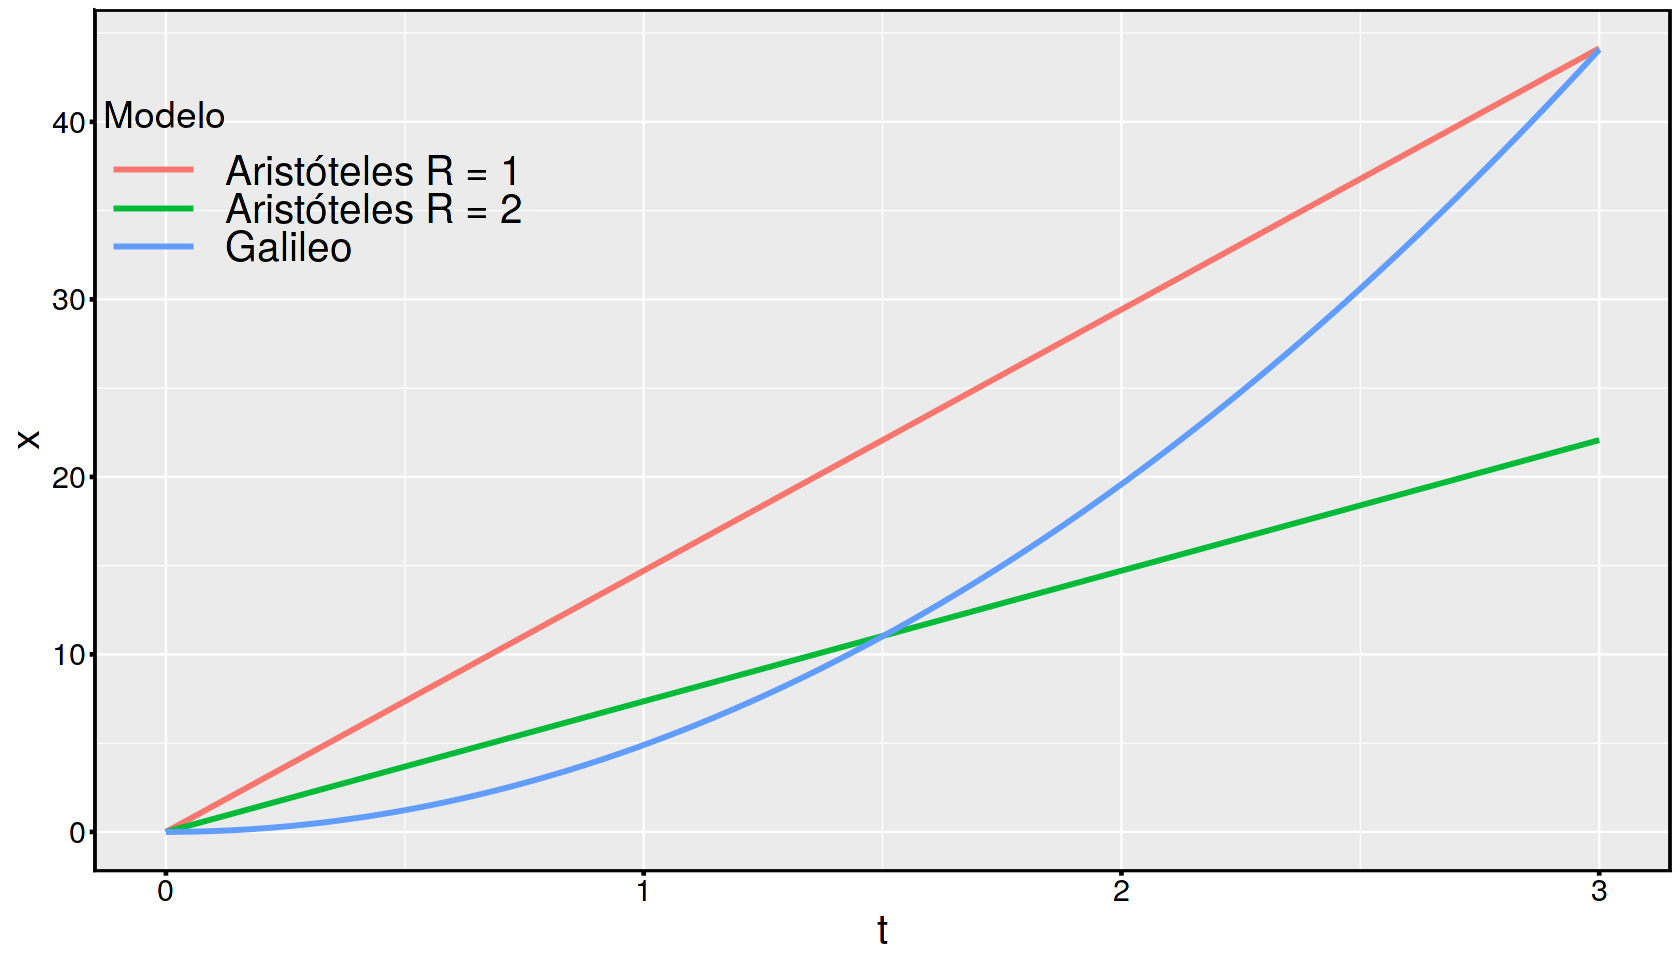

In [4]:
fig(14,8)
show(gmod)

# Prueba cebras

La idea es un acrílico (pedazo de botella de soda Talca), el cual está atravesado transversalmente por "cebras" (cinta de aislar).

El acrílico cebra se deja caer desde el reposo desde una altura indeterminada. Al caer, pasa por una fotocompuerta consistente en un diodo emisor de IR y otro receptor, polarizado en inversa.

Los datos colectados son todos los tiempos en los que cambia la señal del receptor, es decir, todas las veces que el receptor "ve" al emisor y todas las veces que el emisor "deja de ver" al receptor, se activa una interrupción que guarda el tiempo en que esto ocurre, relativo a la primera interrupción.

Las cebras:
+ Cinta aisladora.
+ Paralelas entre sí (masomenos)
+ 18 mm de ancho, equiespaciados.

Los tiempos guardados:
+ Separados en "tiradas"
+ Separados en número de interrupción "cinta"
+ En $\mu s$ ($10^{-6} s$)



# Carga datos

In [5]:
setwd("/home/juan/Documentos/Docencia/fexpi/Cebras/")
d <- read.csv("talcafina2.csv", header = T, sep = ";"); 
d$t <- d$t/(10^6);

head(d,12); tail(d)

,Tirada,Cinta,t
,<int>,<int>,<dbl>
1,1,1,0.000000
2,1,2,0.024312
3,1,3,0.047960
4,1,4,0.062412
5,1,5,0.079024
6,1,6,0.090760
7,1,7,0.104360
8,1,8,0.114280
9,1,9,0.126060


,Tirada,Cinta,t
,<int>,<int>,<dbl>
995,100,5,0.075336
996,100,6,0.086660
997,100,7,0.099984
998,100,8,0.109620
999,100,9,0.121224
1000,100,10,0.129764


### Agregamos las posiciones de cada cinta a a mano.

In [6]:
#agregamos cada x_i desde medidas hechas con Image J
#probablemente lo mejor sea meterlas en el código de arduino
x <- c(17.78,18.29,17.52,17.6983,17.9052,17.6014,17.80,17.78,17.87)/1000
x <- c(0,cumsum(x)); x
d$x <- rep(x, max(d$Tirada));

[1] 0.0000000 0.0177800 0.0360700 0.0535900 0.0712883 0.0891935 0.1067949
 [8] 0.1245949 0.1423749 0.1602449

In [7]:
head(d, 12); tail(d,12)

,Tirada,Cinta,t,x
,<int>,<int>,<dbl>,<dbl>
1,1,1,0.000000,0.0000000
2,1,2,0.024312,0.0177800
3,1,3,0.047960,0.0360700
4,1,4,0.062412,0.0535900
5,1,5,0.079024,0.0712883
6,1,6,0.090760,0.0891935
7,1,7,0.104360,0.1067949
8,1,8,0.114280,0.1245949
9,1,9,0.126060,0.1423749


,Tirada,Cinta,t,x
,<int>,<int>,<dbl>,<dbl>
989,99,9,0.115952,0.1423749
990,99,10,0.124564,0.1602449
991,100,1,0.000000,0.0000000
992,100,2,0.022320,0.0177800
993,100,3,0.045136,0.0360700
994,100,4,0.059000,0.0535900
995,100,5,0.075336,0.0712883
996,100,6,0.086660,0.0891935
997,100,7,0.099984,0.1067949


In [8]:
#incorpora delay's
tmod <- vector(mode = "numeric")
for(i in 1:max(d$Tirada)){
                            tcinta <- d$t[d$Tirada == i]
                            tcinta <- tcinta + rep(c(-126, -10)/10^5, length.out = length(tcinta));
                            tcinta <- tcinta - tcinta[1]
                            tmod <- c(tmod,tcinta)       
                          }
d$tmod <- tmod

In [9]:
fig(20,12)
gt <- ggplot(data = d) + 
geom_point(aes(x = t, y = x), colour = "Black", show.legend = F, size = 2 ) + 
#geom_point(aes(x = tmod,y = x + 0.0025), colour = "Black", show.legend = F, size = 2 ) + 
temajuan2
fig(16,9)

## ¿Cómo se ven los datos?

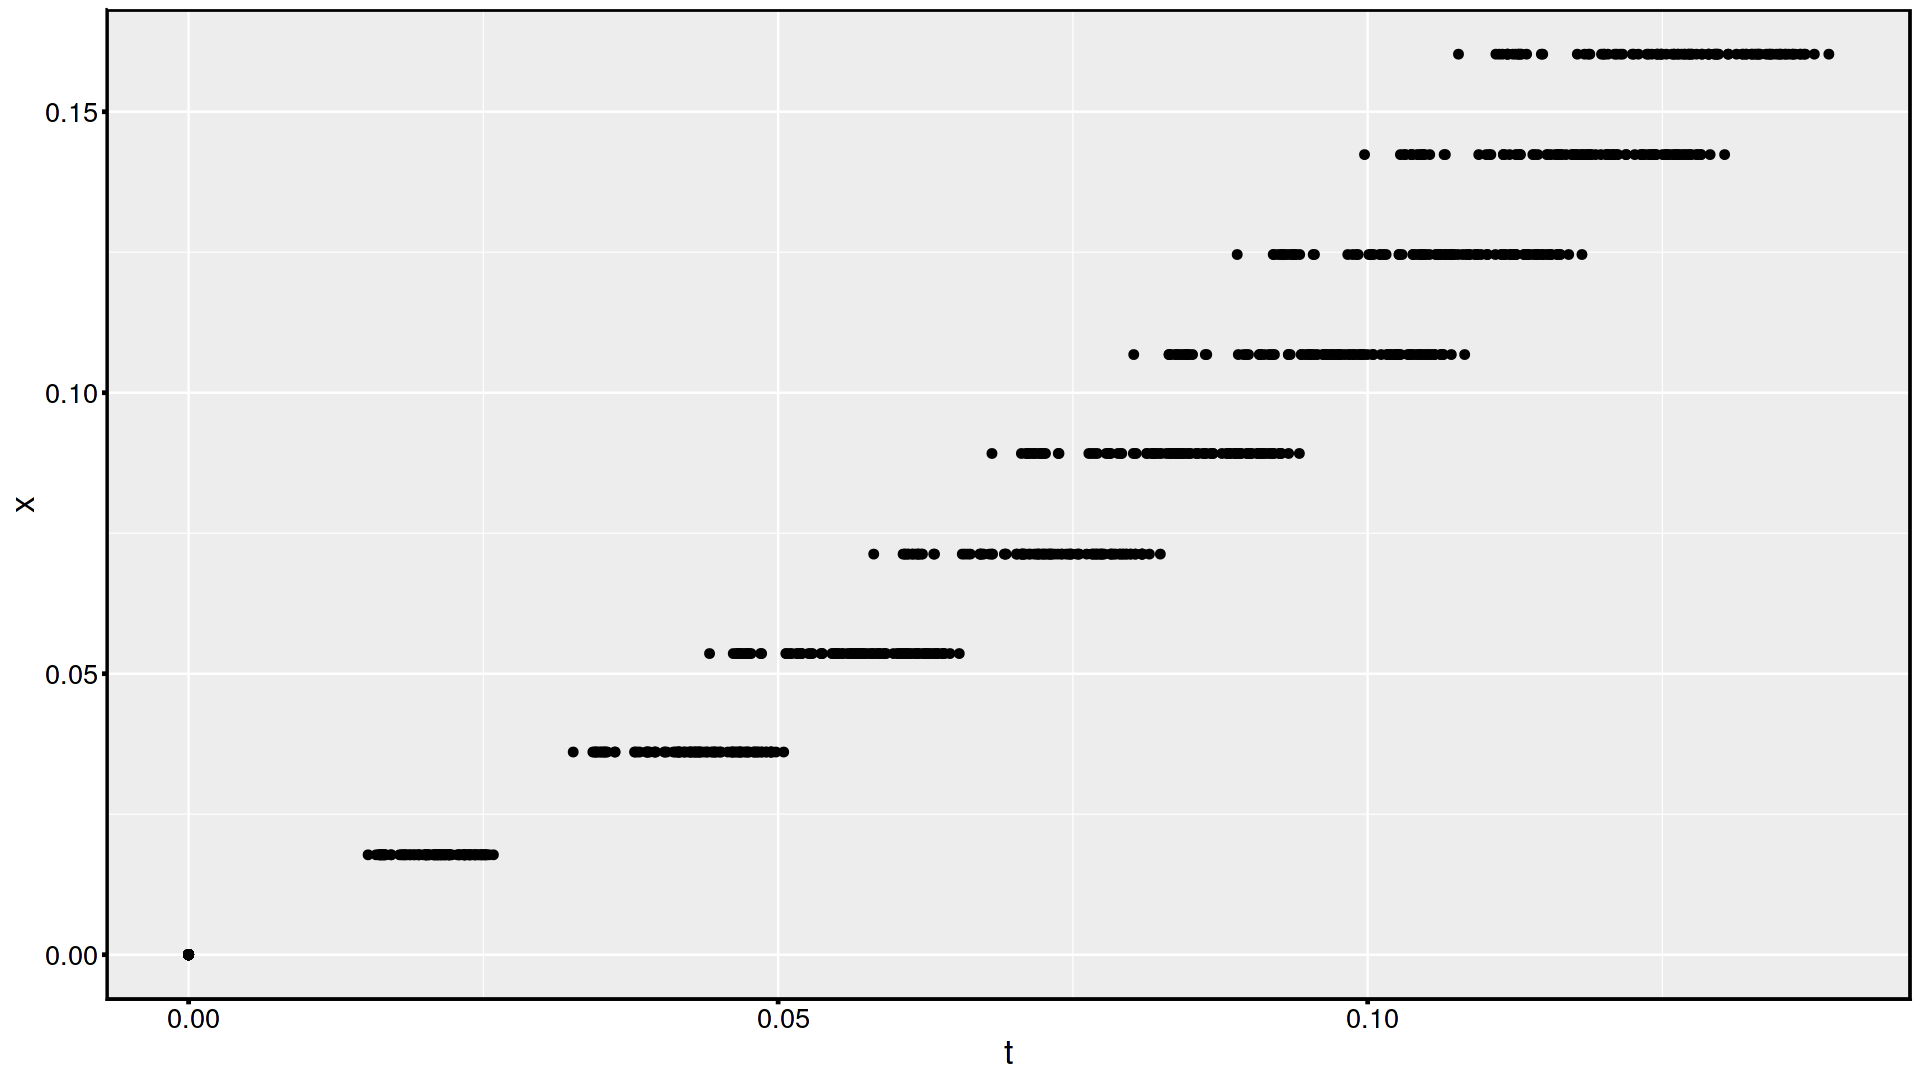

In [10]:
show(gt)

Es posible observar que:

* Parece que todos los datos le pegan más a Galileo, pero no es posible saberlo (a simple vista entra una recta o una parábola?) Sólo porque ya lo saben.....

# Estimando g

Ya corroboramos que las suposiciones de la distancia no están erradas, y que nuestras cebras están bastante bien equiespaciadas (de lo contrario veríamos una recta, aunque más sucia).

Ahora vamos con los cálculos de g:

El tiempo $t_i$ de la tirada $i$ es el tiempo de cambio entre claro/oscuro ó viceversa. Vamos a calcular velocidades medias en cada tramo, suponiendo los $0.018 \, m$ de separación entre cada tirada.

In [11]:
Tirada <- vector(mode = "integer")
n <- vector(mode = "integer")
t <- vector(mode = "numeric")
v <- vector(mode = "numeric")
tp <- vector(mode = "numeric")
vp <- vector(mode = "numeric")

In [12]:
for(i in 1:max(d$Tirada)){
    pedazo <- d[d$Tirada == i , ] #selecciona tirada i    

    tpedazo <- diff(pedazo$tmod)/2 + pedazo$tmod[1:nrow(pedazo)-1]
    vpedazo <- diff(pedazo$x)/diff(pedazo$tmod)
    
    vpedazo <- vpedazo - vpedazo[1]
    
    
    tprueba <- pedazo$t[1:nrow(pedazo)-1]
    vprueba <- vpedazo - vpedazo[1]
    Tirada <- c(Tirada, rep(i, length(tpedazo)))
    n <- c(n, seq(1,length(tpedazo)))
    t <- c(t, tpedazo)
    v <- c(v, vpedazo)  
    tp <- c(tp, tprueba)
    vp <- c(vp, vprueba)  
    }

In [13]:
length(t); length(v)

[1] 900

[1] 900

In [14]:
cuentas <- data.frame(Tirada = Tirada, n = n, t.medio = t, v.media = v, tp = tp, vp = vp)
rm(tpedazo,vpedazo, Tirada, n, t, v, tp, vp)

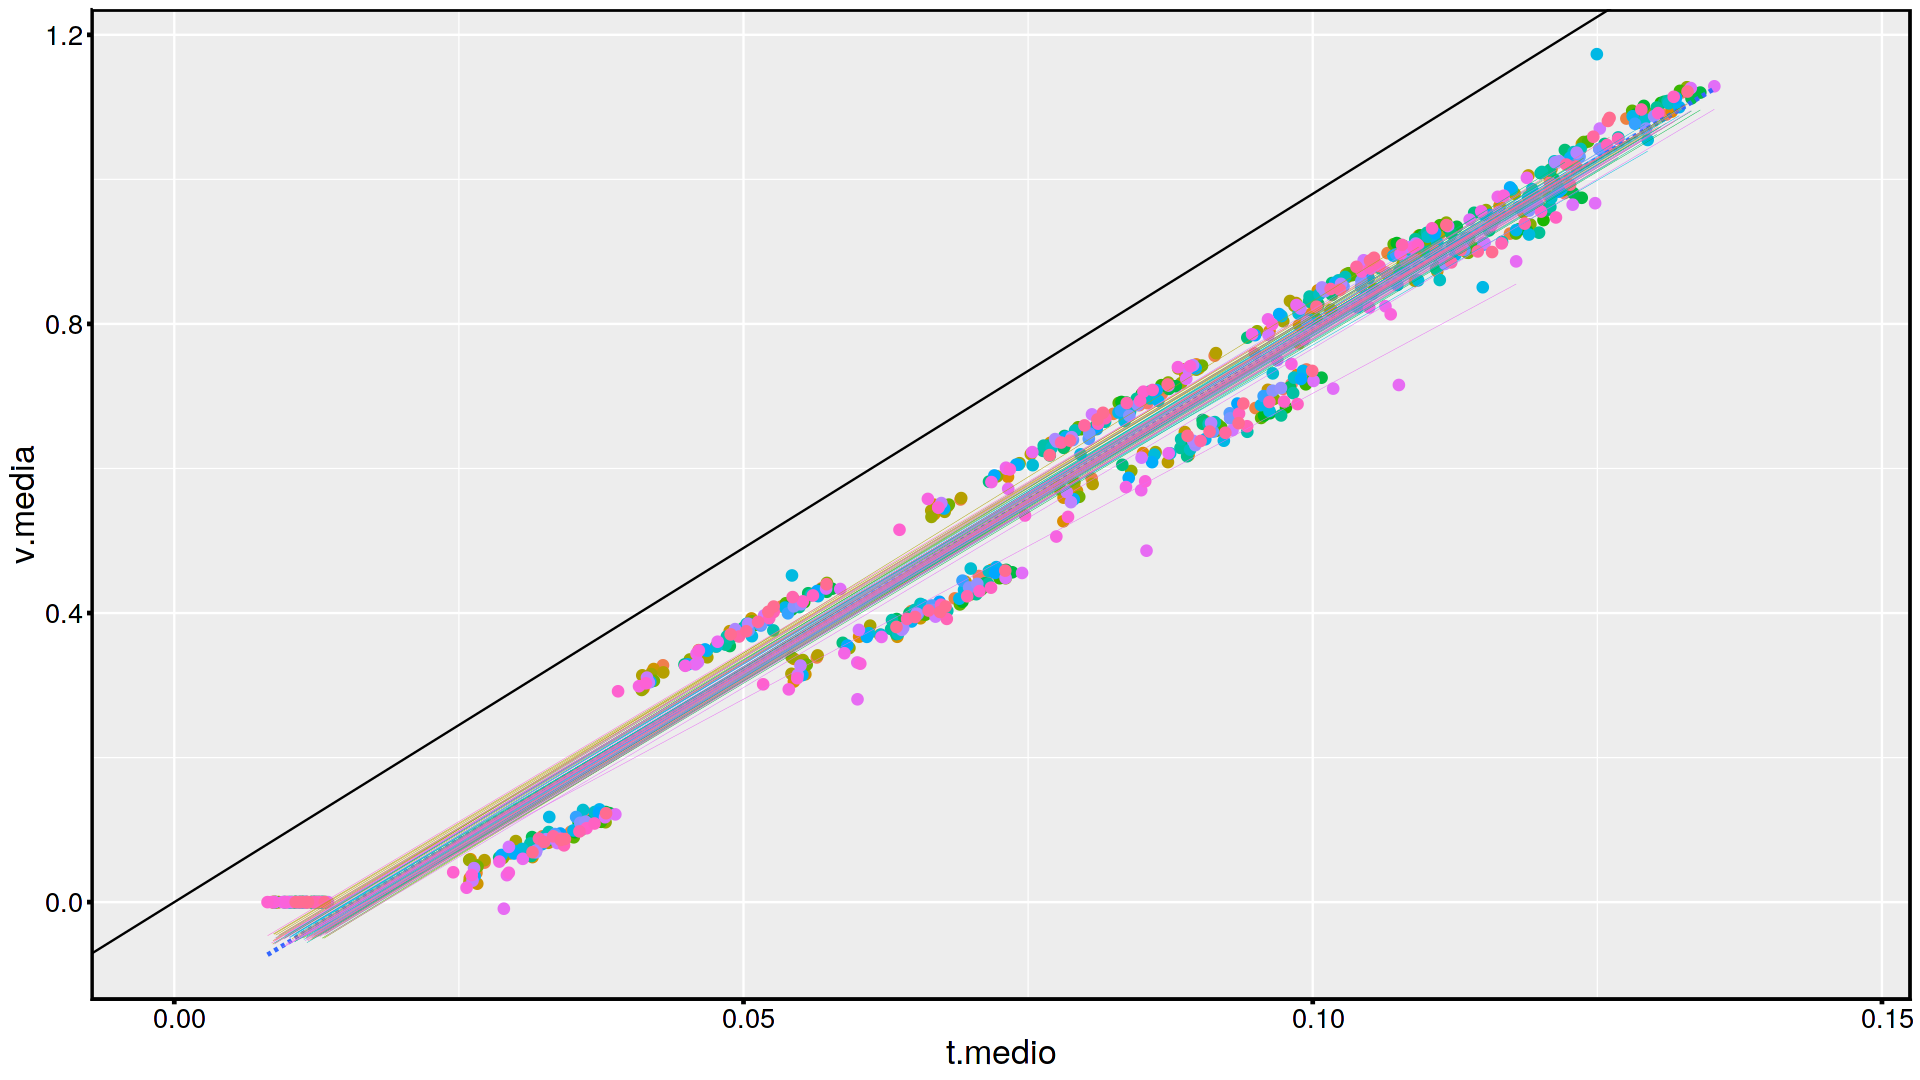

In [15]:
gvm <- ggplot(data = cuentas) + 
geom_point(aes(x = t.medio, y = v.media , colour = factor(Tirada)), size = 2.5,show.legend = F) +
geom_smooth(aes(x = t.medio, y = v.media), method = "lm", formula = "y ~ x", lty = 2, show.legend = F, se = F) + 
geom_smooth(aes(x = t.medio, y = v.media, colour = factor(Tirada)), method = "lm", formula = "y ~ x", lty = 1,
             show.legend = F, lwd = 0.1, se = F) +
scale_x_continuous(limits = c(0, max(cuentas$t.medio)+0.01)) + 

geom_abline(slope = 9.8,intercept = 0) + 
temajuan2
show(gvm)

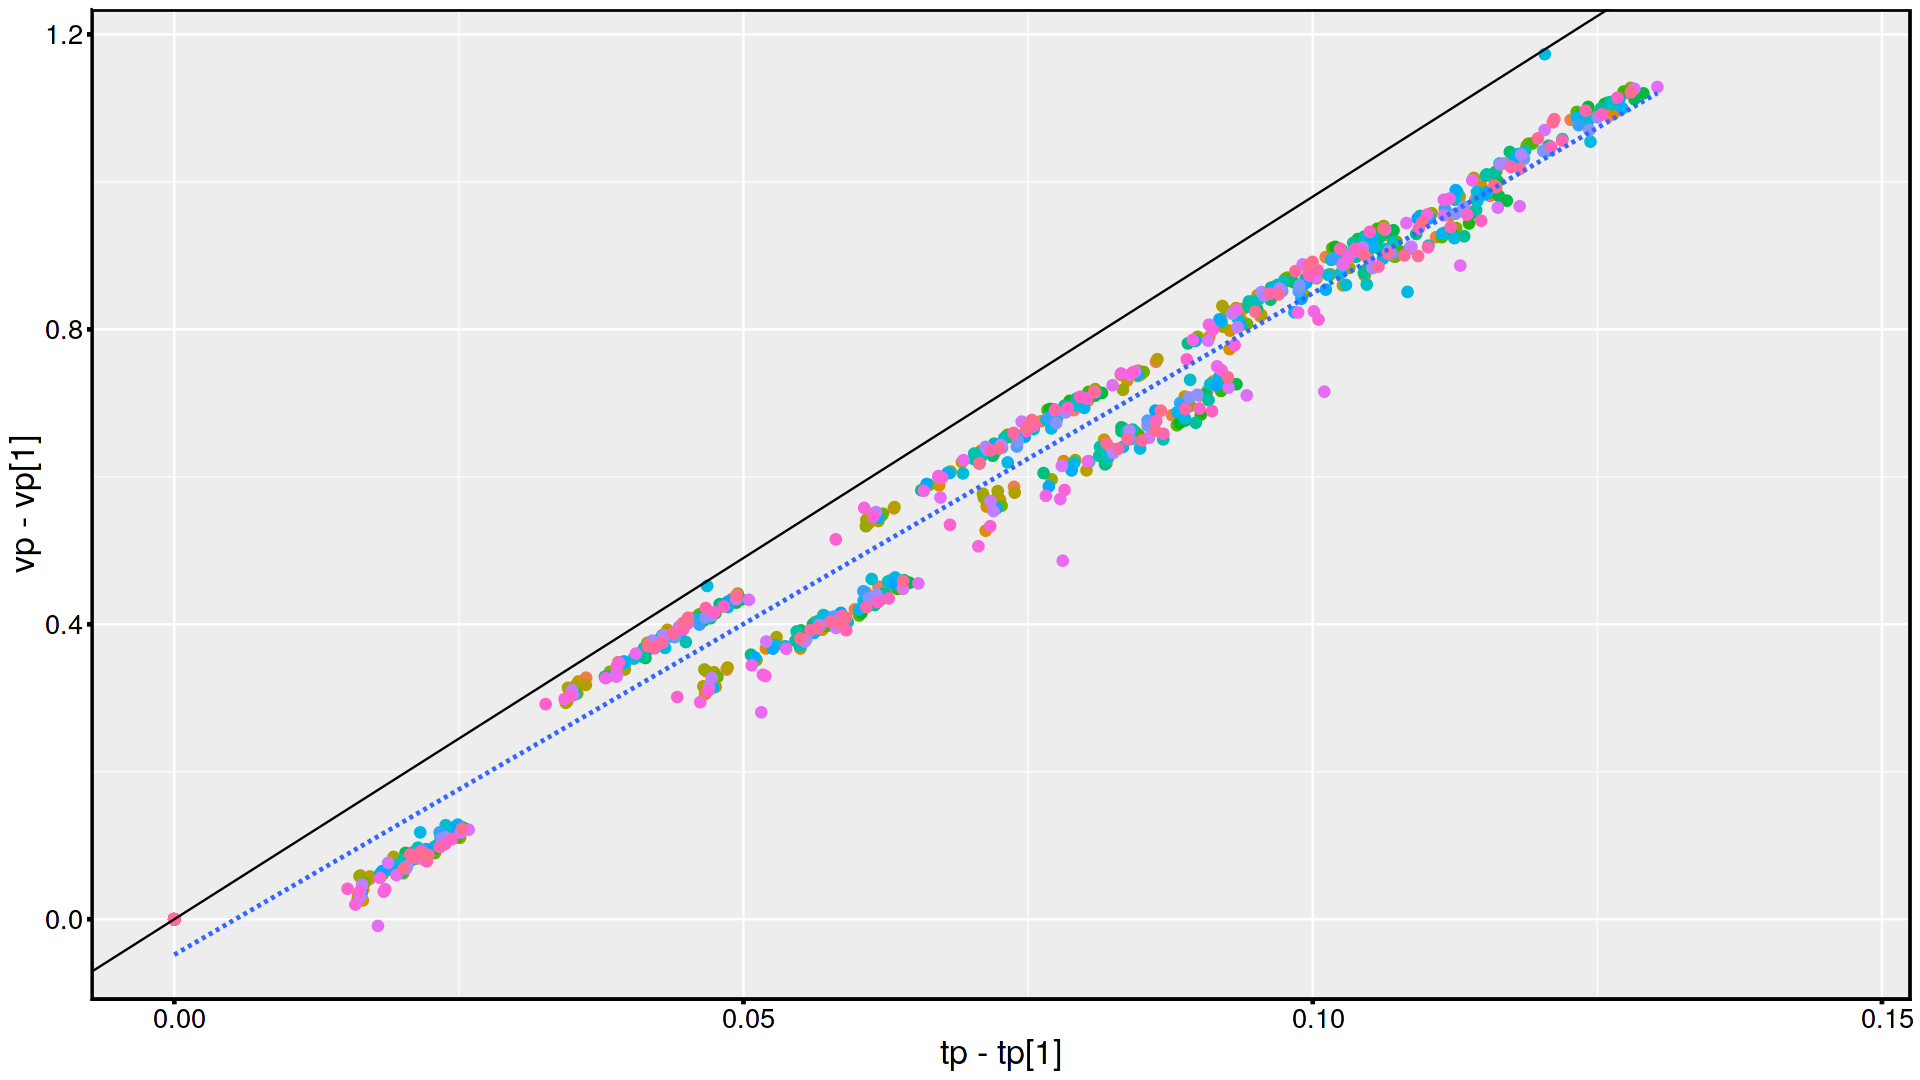

In [19]:
gvm <- ggplot(data = cuentas) + 
geom_point(aes(x = tp- tp[1], y = vp-vp[1] , colour = factor(Tirada)), size = 2.5,show.legend = F) +
geom_smooth(aes(x = tp, y = vp), method = "lm", formula = "y ~ x", lty = 2, show.legend = F, se = F) + 
#geom_smooth(aes(x = t.medio - t.medio[1], y = v.media-v.media[1], colour = factor(Tirada)),
#            method = "lm", formula = "y ~ 0 + x", lty = 1,
#             show.legend = F, lwd = 0.1, se = T, alpha = 0.01) +
scale_x_continuous(limits = c(0, max(cuentas$t.medio)+0.01)) + 

geom_abline(slope = 9.8,intercept = 0) + 
temajuan2
show(gvm)

In [20]:
g <- vector(mode = "numeric", length = max(cuentas$Tirada))
sigma.g <- vector(mode = "numeric", length = max(cuentas$Tirada))
vo <- vector(mode = "numeric", length = max(cuentas$Tirada))

for(i in 1:max(cuentas$Tirada)){
 
    aju <- lm(cuentas$v.media[cuentas$Tirada == i] ~ cuentas$t.medio[cuentas$Tirada == i])
g[i] <- summary.lm(aju)$coefficients[2,1]
sigma.g[i] <- summary.lm(aju)$coefficients[2,2]
vo[i] <- summary.lm(aju)$coefficients[1,1]      
}

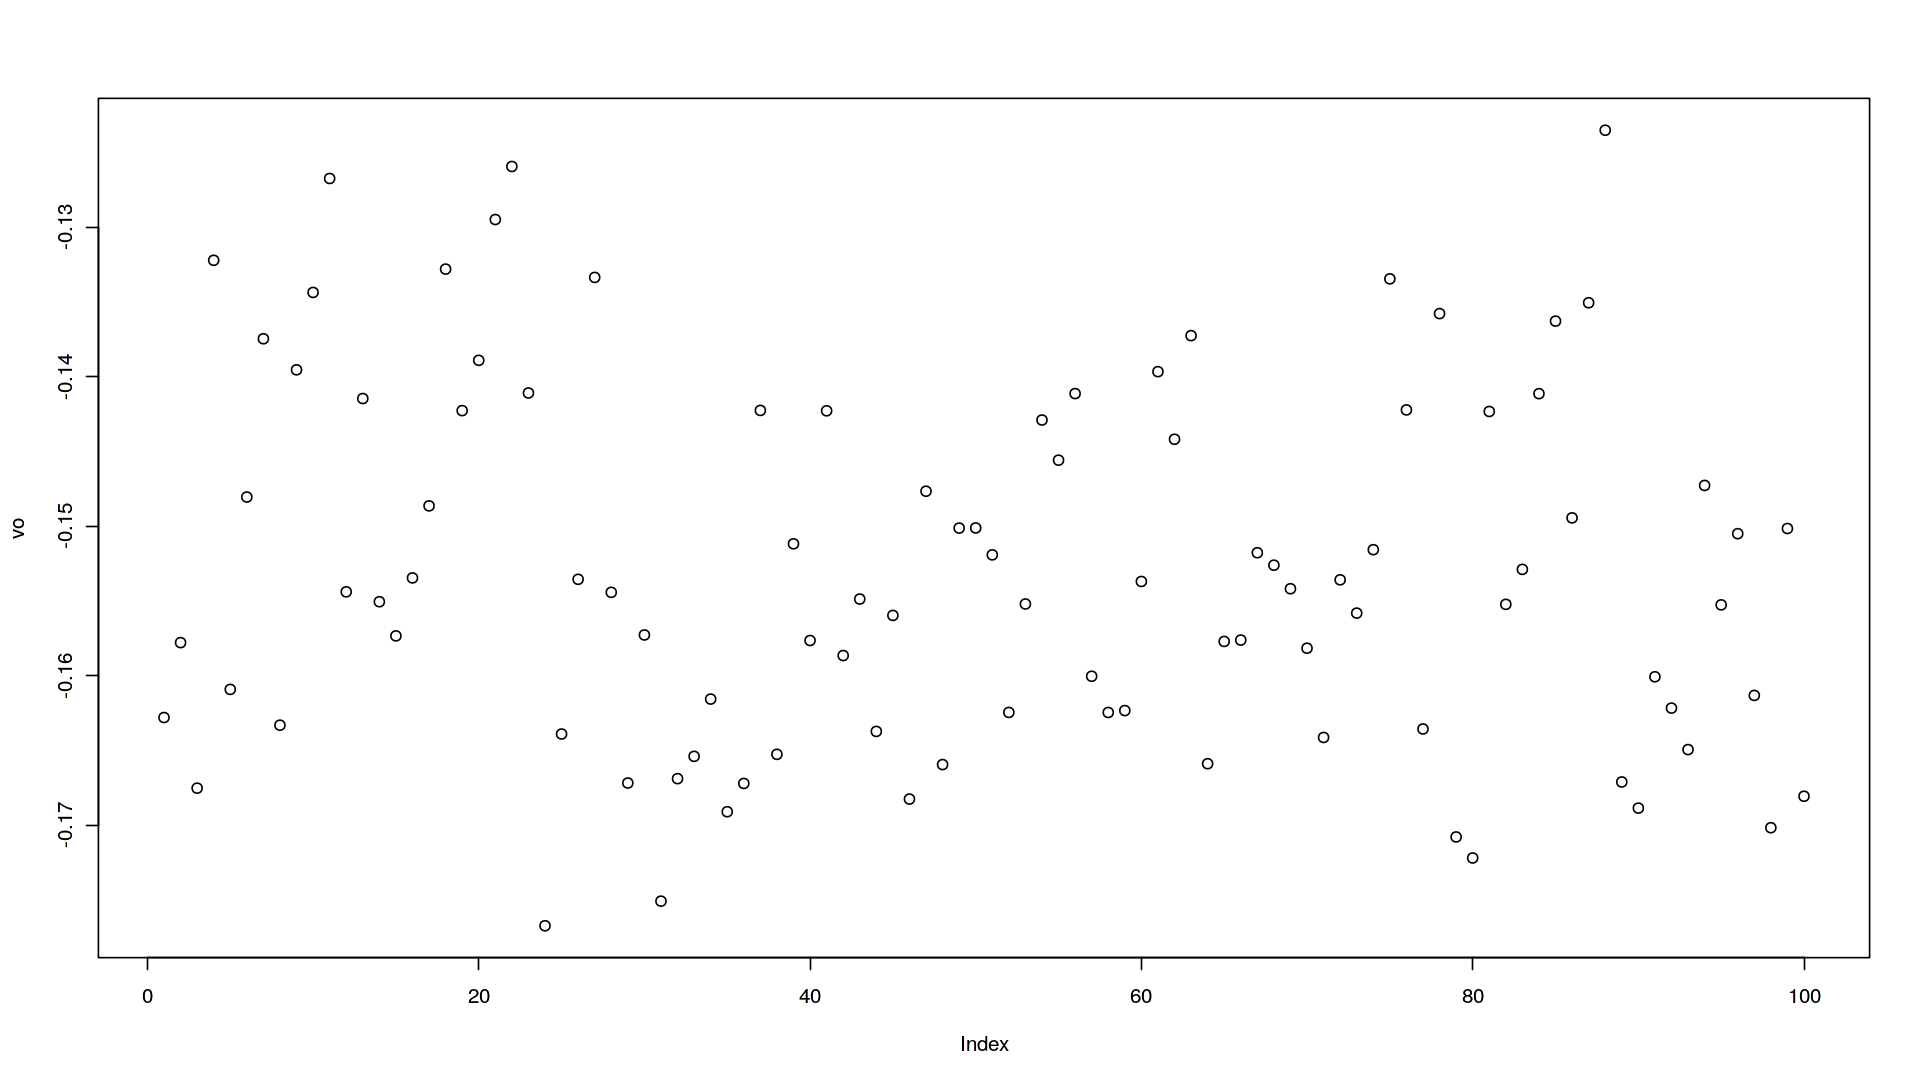

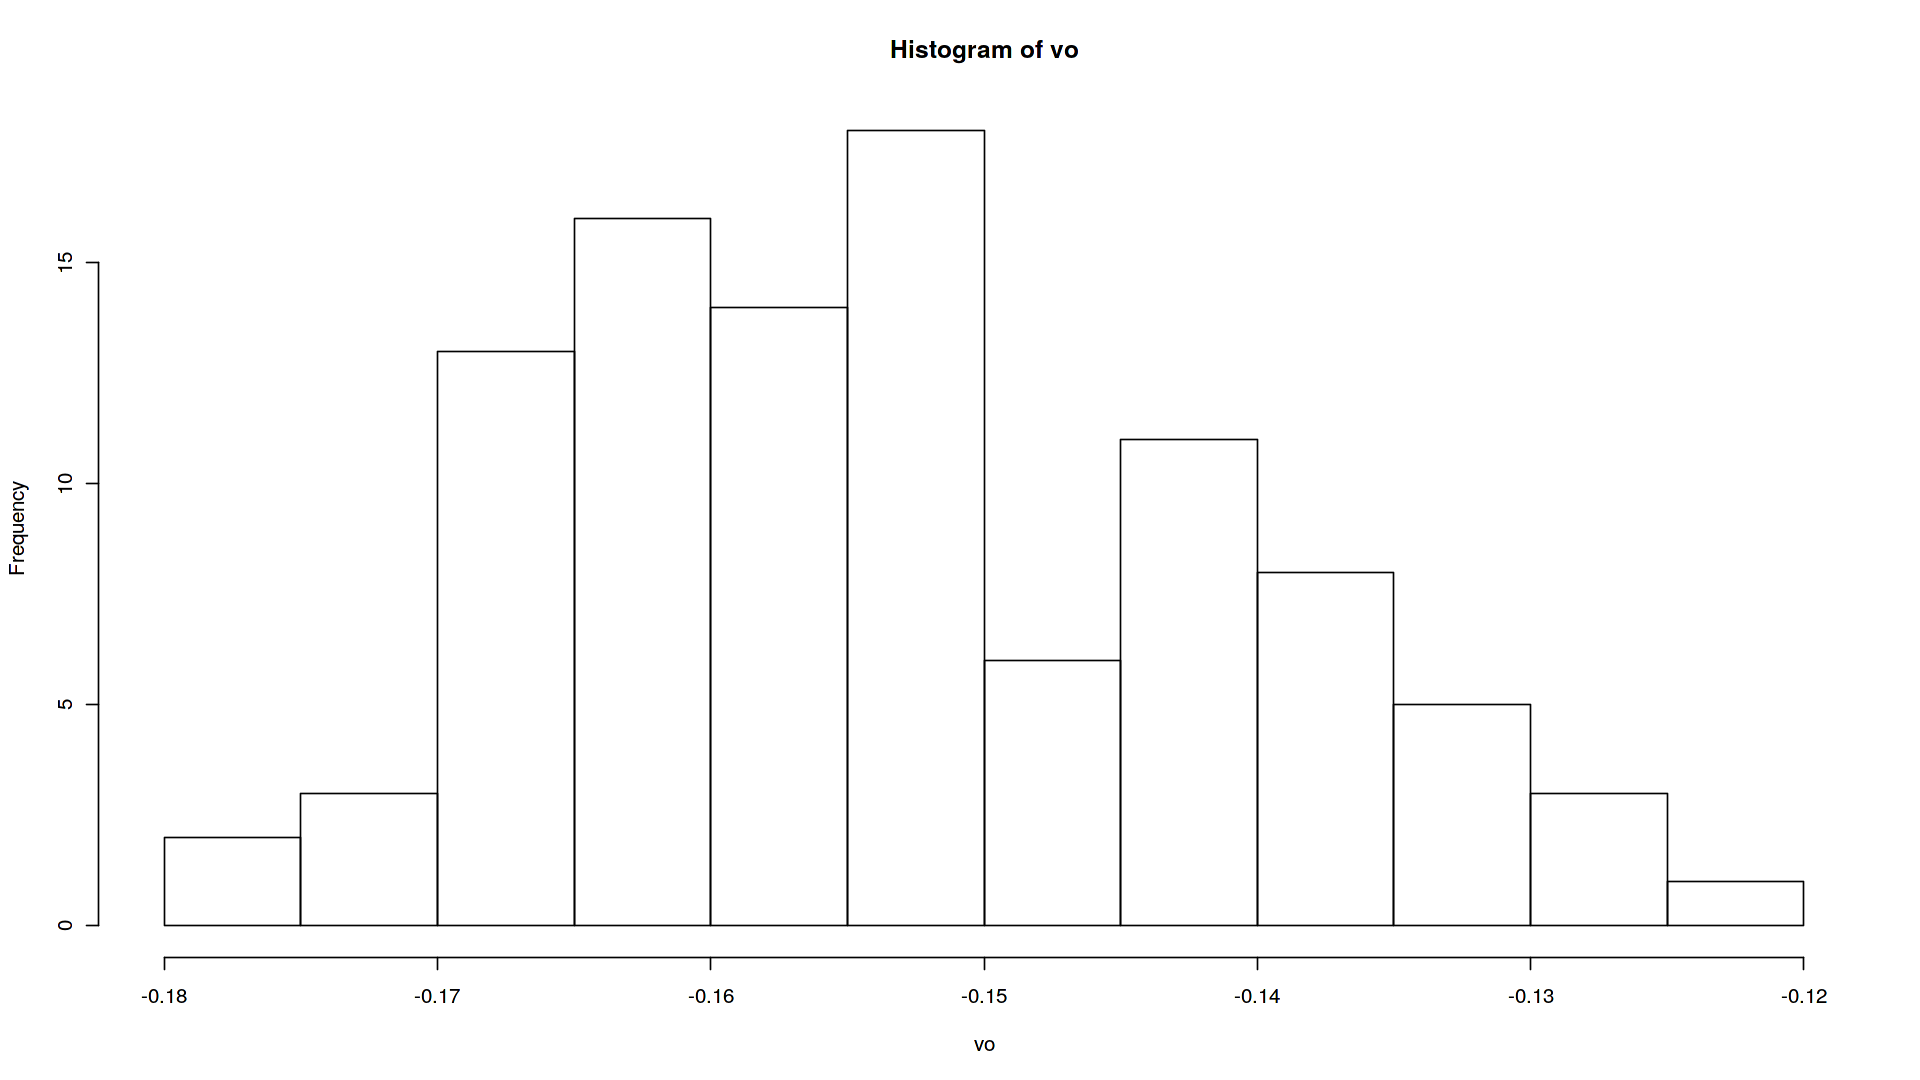

In [21]:
plot(vo); hist(vo, breaks = 10)

[1] 9.480619

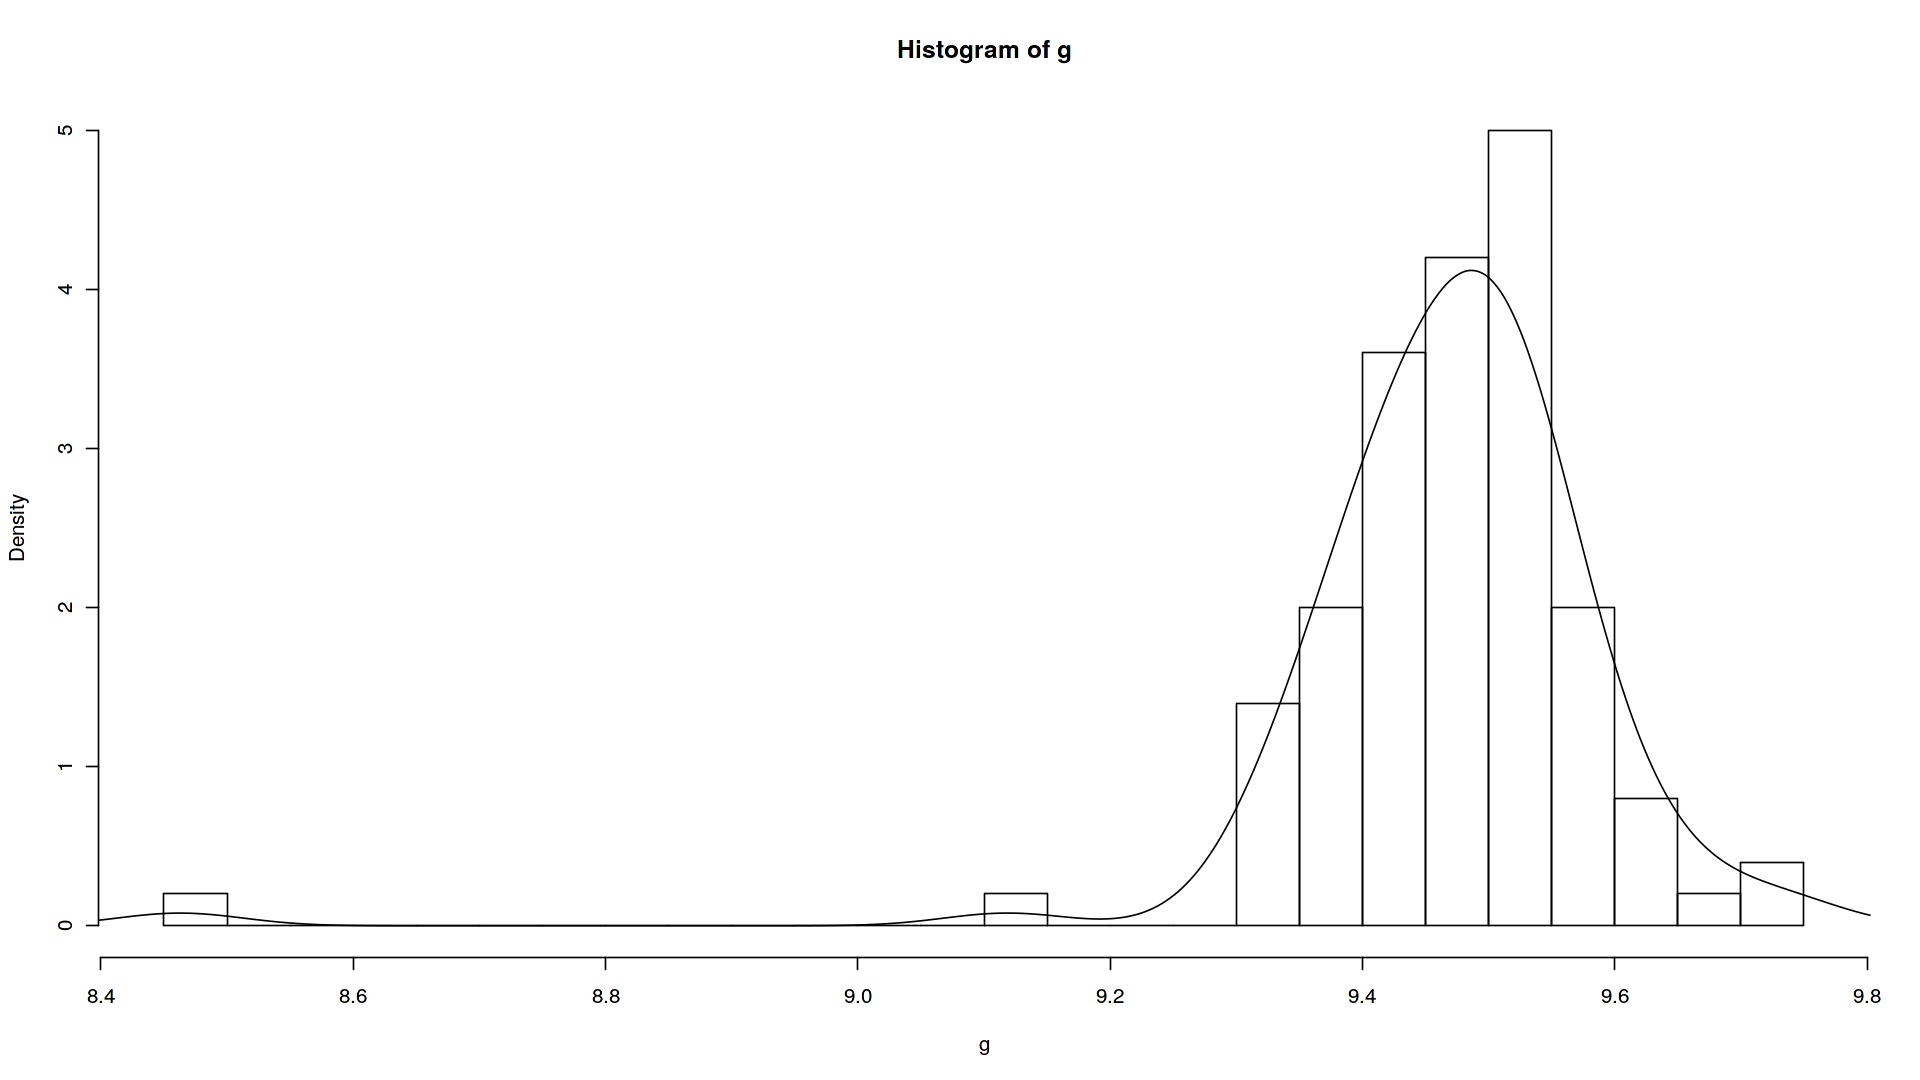

In [23]:
hist(g, breaks = nclass.FD(g), probability = T);
lines(density(g, bw = 0.05))
mean(g[g > 9.2])

In [18]:
gl <- g[g>9.2]; sgl <- sigma.g[g>9.2]

mean(gl)

mlmean <- sum(gl/sgl^2)/sum(1/sgl^2); mlmean
mlsgl <- sqrt( 1/sum(1/sgl^2));mlsgl
mean(sgl) / sqrt(length(sgl))

ERROR: Error in eval(expr, envir, enclos): objeto 'g' no encontrado


ERROR: Error in eval(expr, envir, enclos): objeto 'sigma.g' no encontrado


In [83]:
head(d)

,Tirada,Cinta,t,x,tmod
,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,1,0.000000,0.0000000,0.000000
2,1,2,0.024312,0.0177800,0.025472
3,1,3,0.047960,0.0360700,0.047960
4,1,4,0.062412,0.0535900,0.063572
5,1,5,0.079024,0.0712883,0.079024
6,1,6,0.090760,0.0891935,0.091920


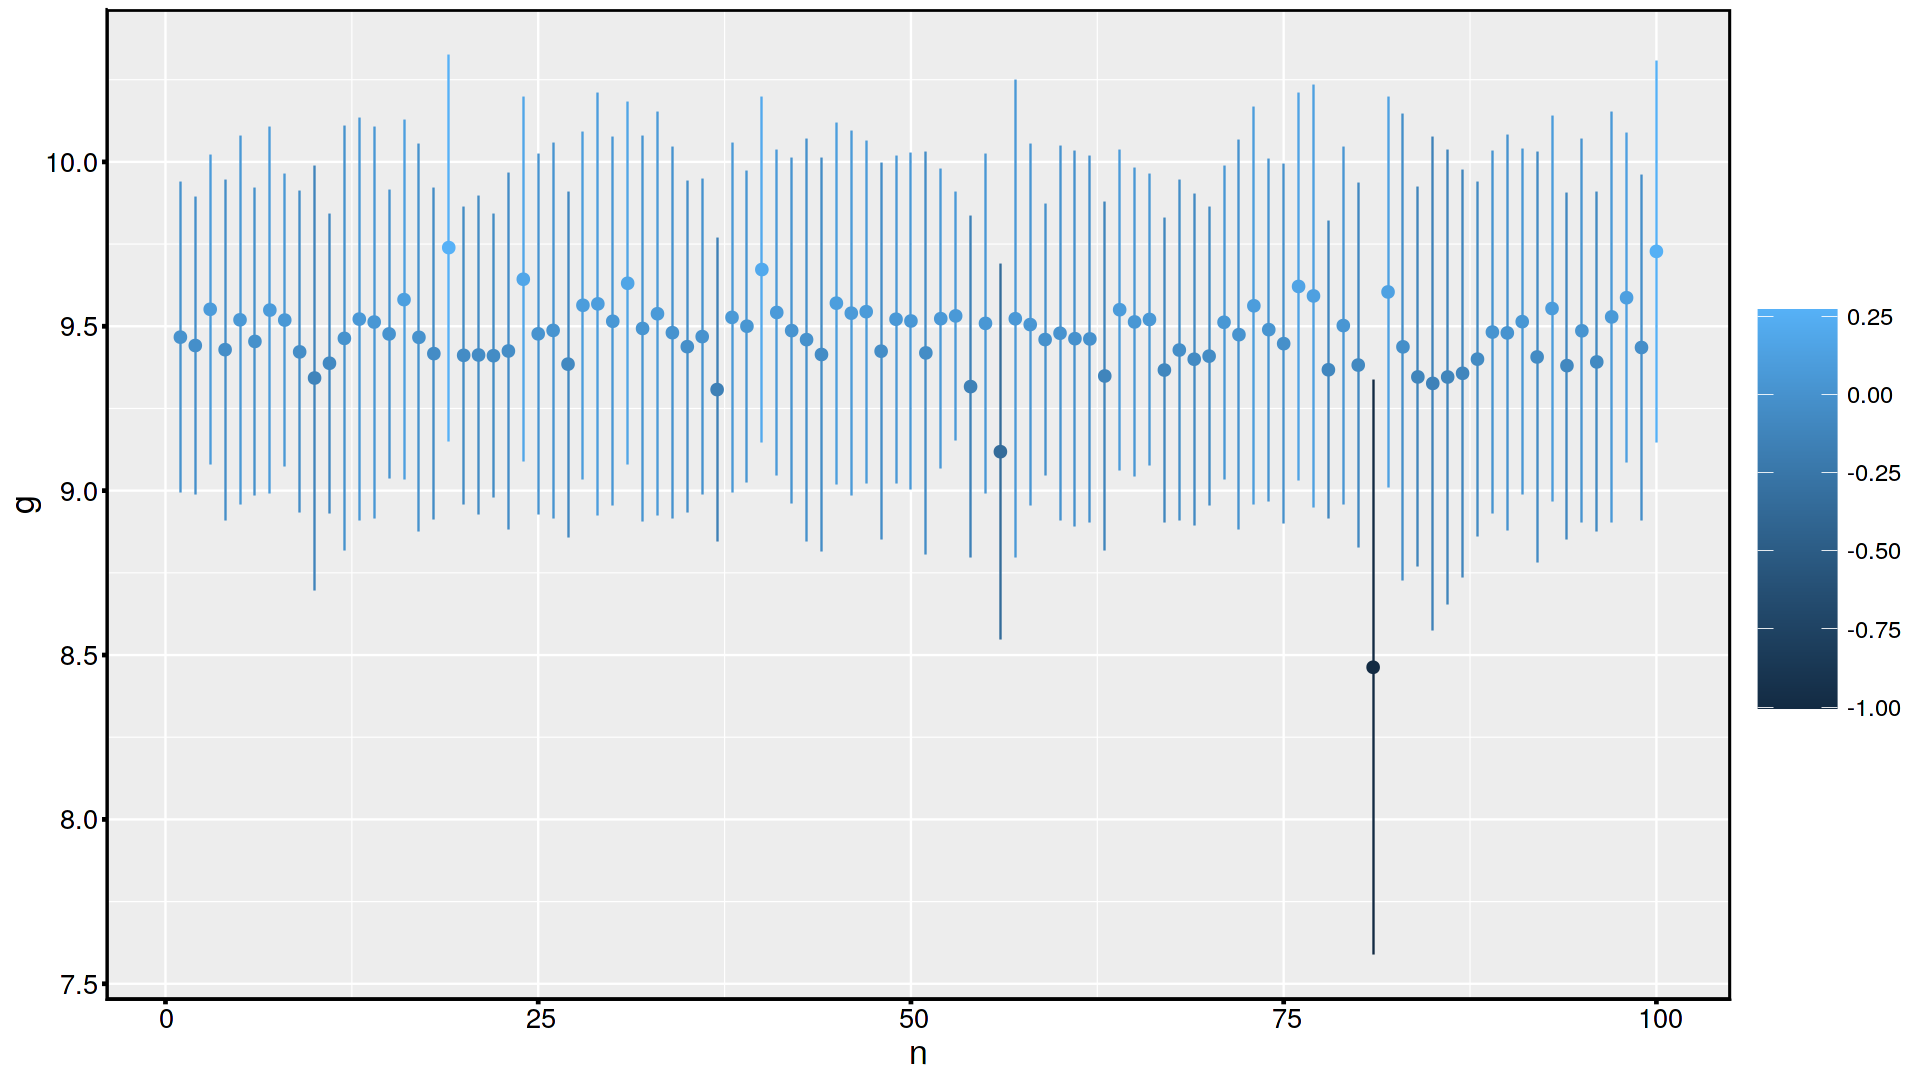

In [27]:
ggplot(data = data.frame(n = 1:length(g),g = g, sg = sigma.g, vo = vo), aes(y = g)) + 
geom_pointrange(aes(x = n,ymin = g-sg,ymax = g+sg, colour = g - mean(g)), show.legend = T) + temajuan2 + theme(legend.text = element_text(size = 14))

No parece haber correlación entre la velocidad inicial y la estimación de g. Descartamos esto.

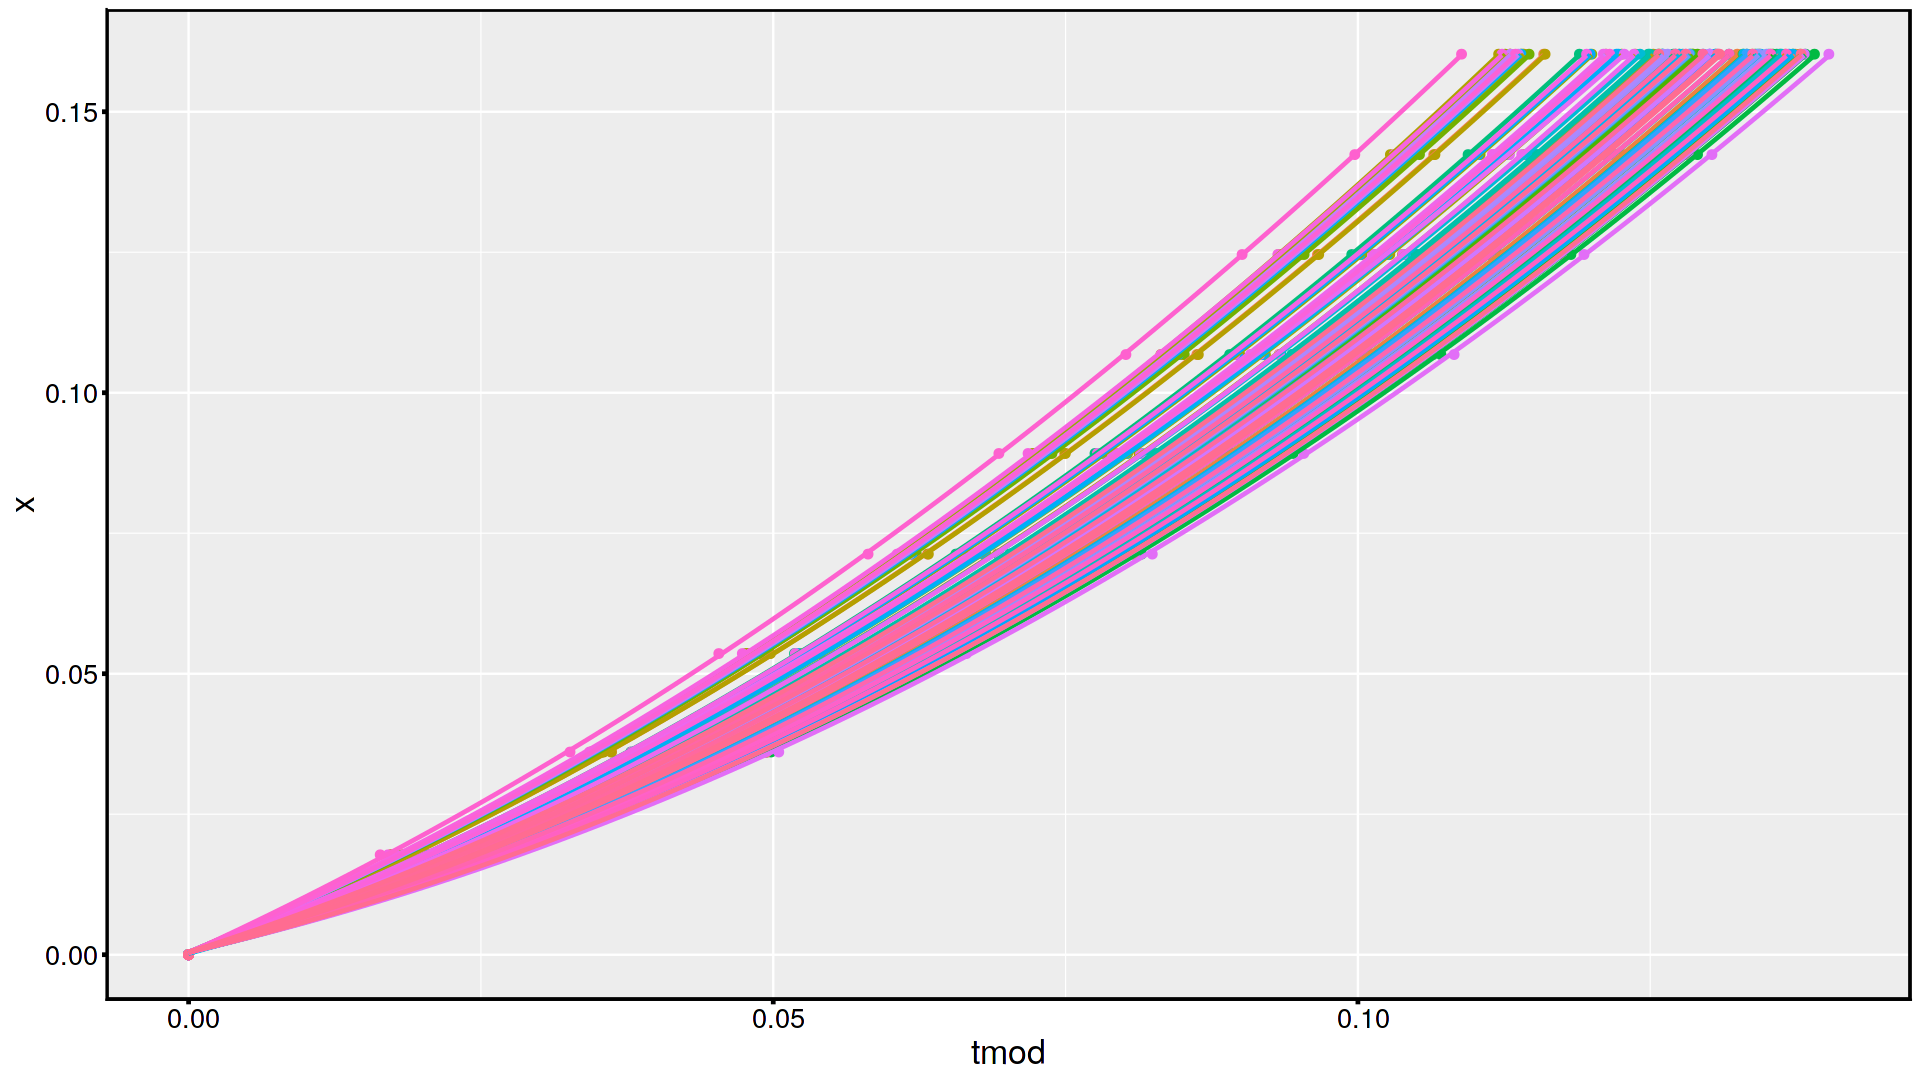

In [86]:
gx <- ggplot(data = d) + 
geom_point(aes(x = tmod, y = x, colour = factor(Tirada)), size = 2, show.legend = F) + 
geom_smooth(aes(x = tmod, y = x, colour = factor(Tirada)), method = "lm",
               formula = 'y ~  x + I(x^2)', se = F, show.legend = F) + 
temajuan2
show(gx)

[1] 9.413061

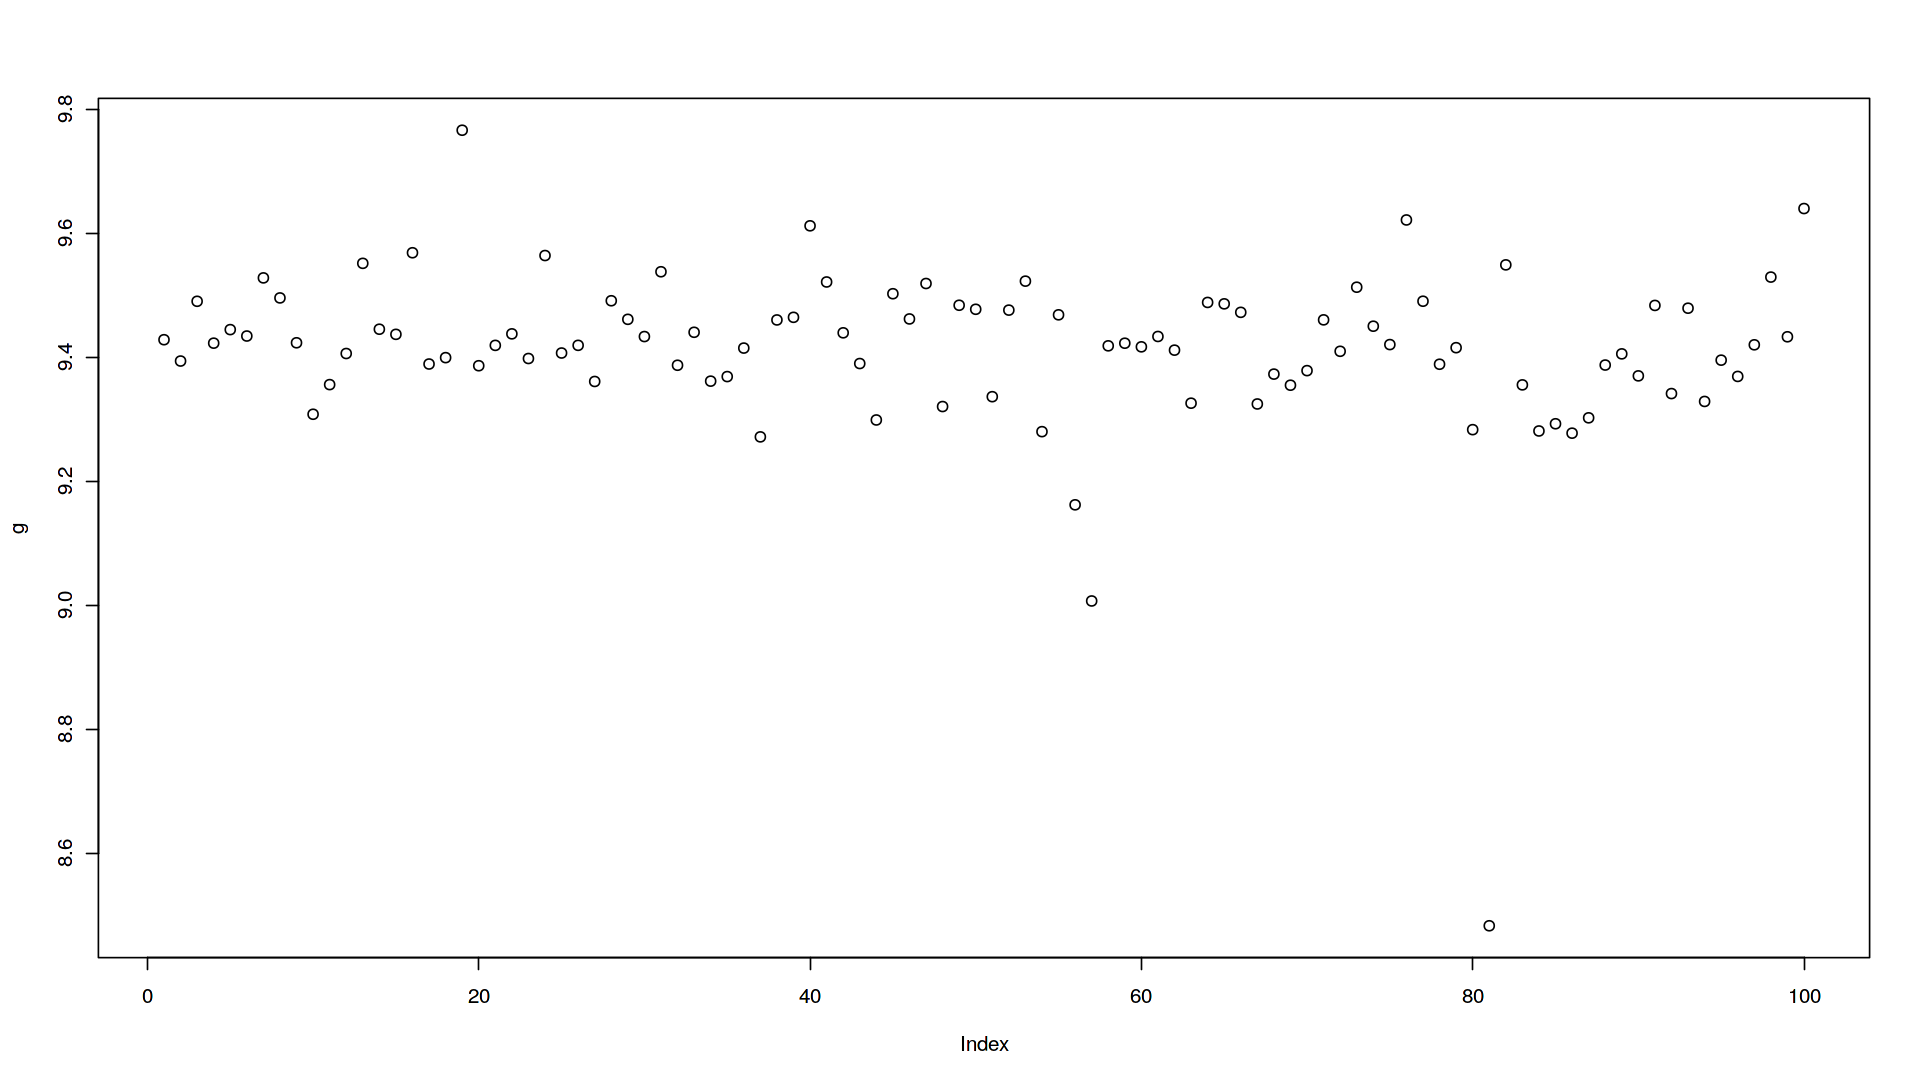

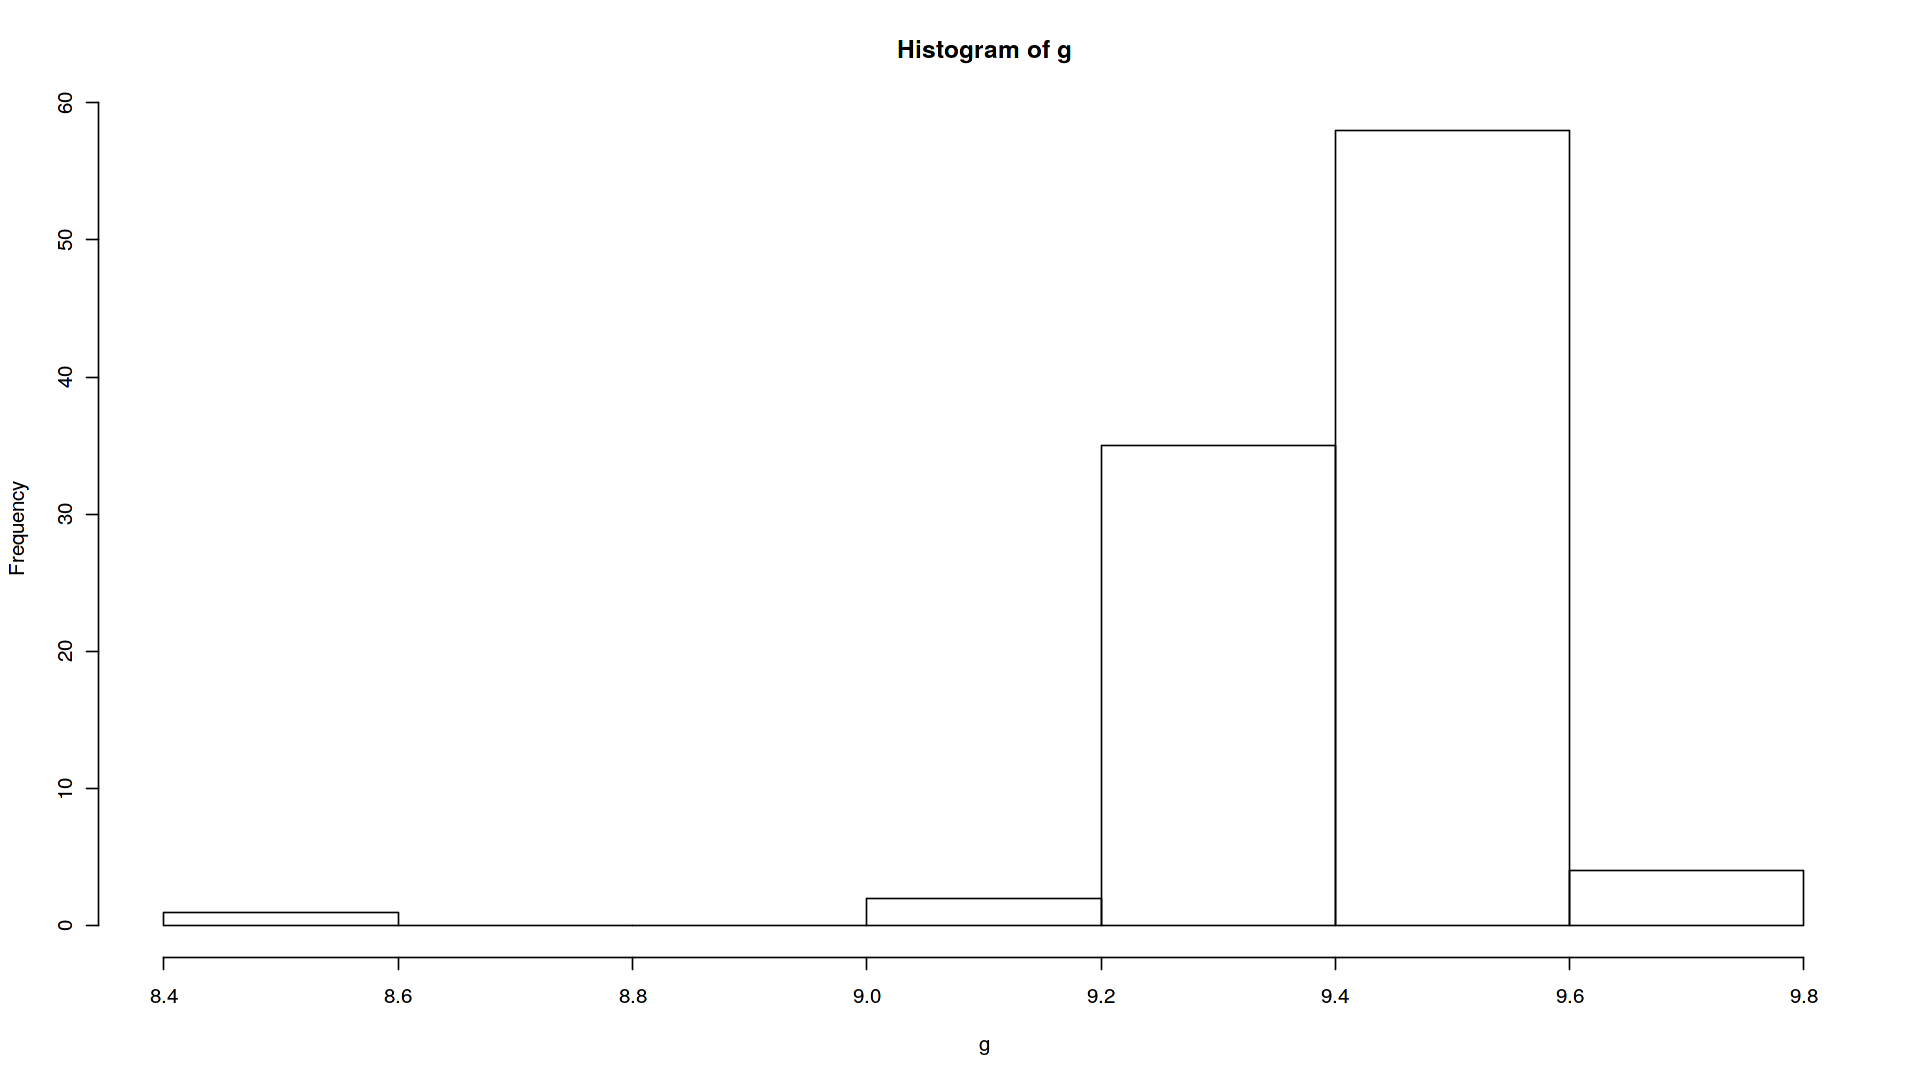

In [103]:
g <- vector(mode = "numeric", length = max(d$Tirada))
sigma.g <- vector(mode = "numeric", length = max(d$Tirada))
v0 <- vector(mode = "numeric", length = max(d$Tirada))
sigma.v0 <- vector(mode = "numeric", length = max(d$Tirada))

for(i in 1: max(d$Tirada)){
ap2 <- lm(d$x[d$Tirada == i] ~ 0 + (d$tmod[d$Tirada == i] + I(d$t[d$Tirada == i]^2)) );
g[i] <- summary.lm(ap2)$coefficients[2,1]*2
sigma.g[i] <- summary.lm(ap2)$coefficients[2,2]*2    
v0[i] <- summary.lm(ap2)$coefficients[1,1]*2
sigma.v0[i] <- summary.lm(ap2)$coefficients[1,2]*2       
}
plot(g); mean(g)


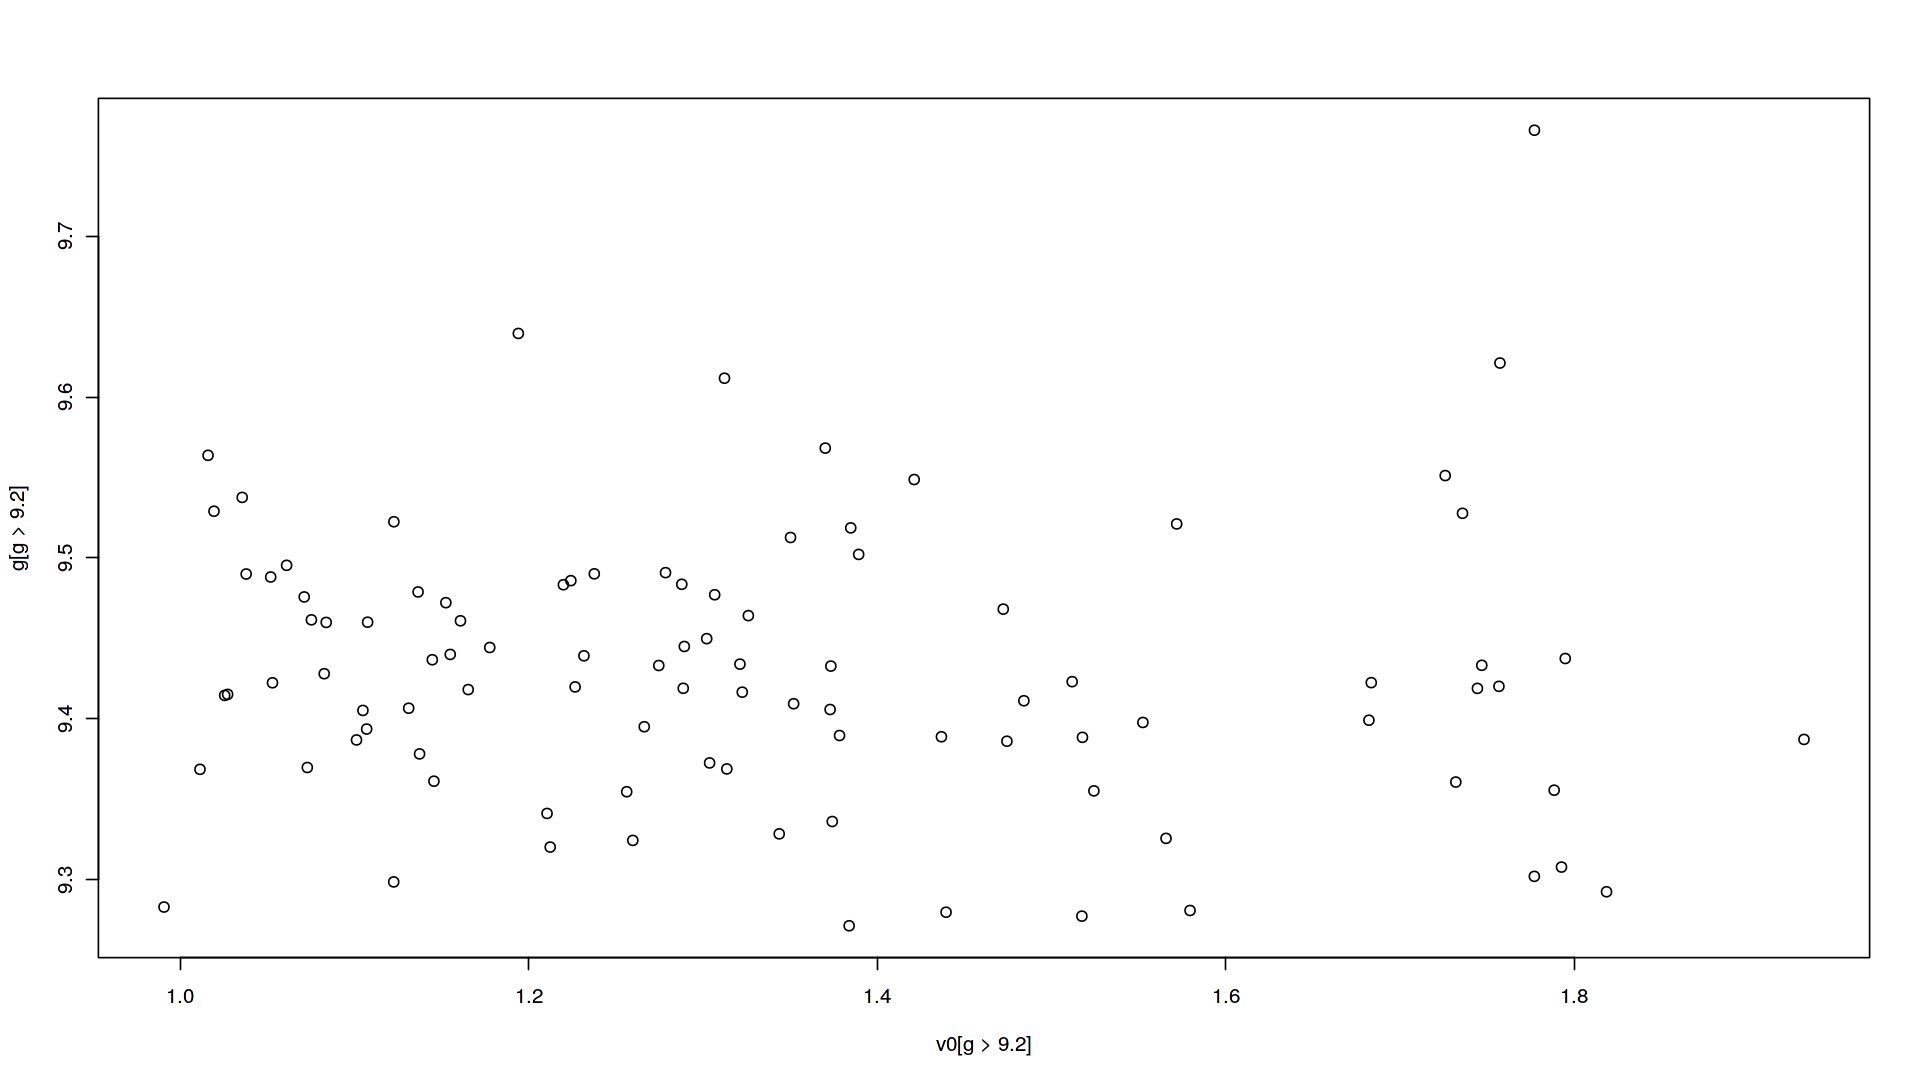

In [105]:
plot(v0[g > 9.2],g[g > 9.2])

In [101]:
ap2 <- lm(d$x[d$Tirada == i] ~ 0 +(d$tmod[d$Tirada == i] + I(d$t[d$Tirada == i]^2)) );


In [102]:
ap2


Call:
lm(formula = d$x[d$Tirada == i] ~ 0 + (d$tmod[d$Tirada == i] + 
    I(d$t[d$Tirada == i]^2)))

Coefficients:
  d$tmod[d$Tirada == i]  I(d$t[d$Tirada == i]^2)  
                  0.597                    4.820  


# Demoras receptor arriba

Cargamos varios valores prendiendo y apagando el emisor.

In [4]:
de <- read.csv("diodeup.csv", header = T, sep = ";"); head(de); nrow(de)

,tprende,tdown
,<int>,<int>
1,57240,57356
2,256984,257100
3,430812,430928
4,589644,589756
5,770468,770584
6,943296,943408


[1] 1475

[1] 126.5681

[1] 11.66469

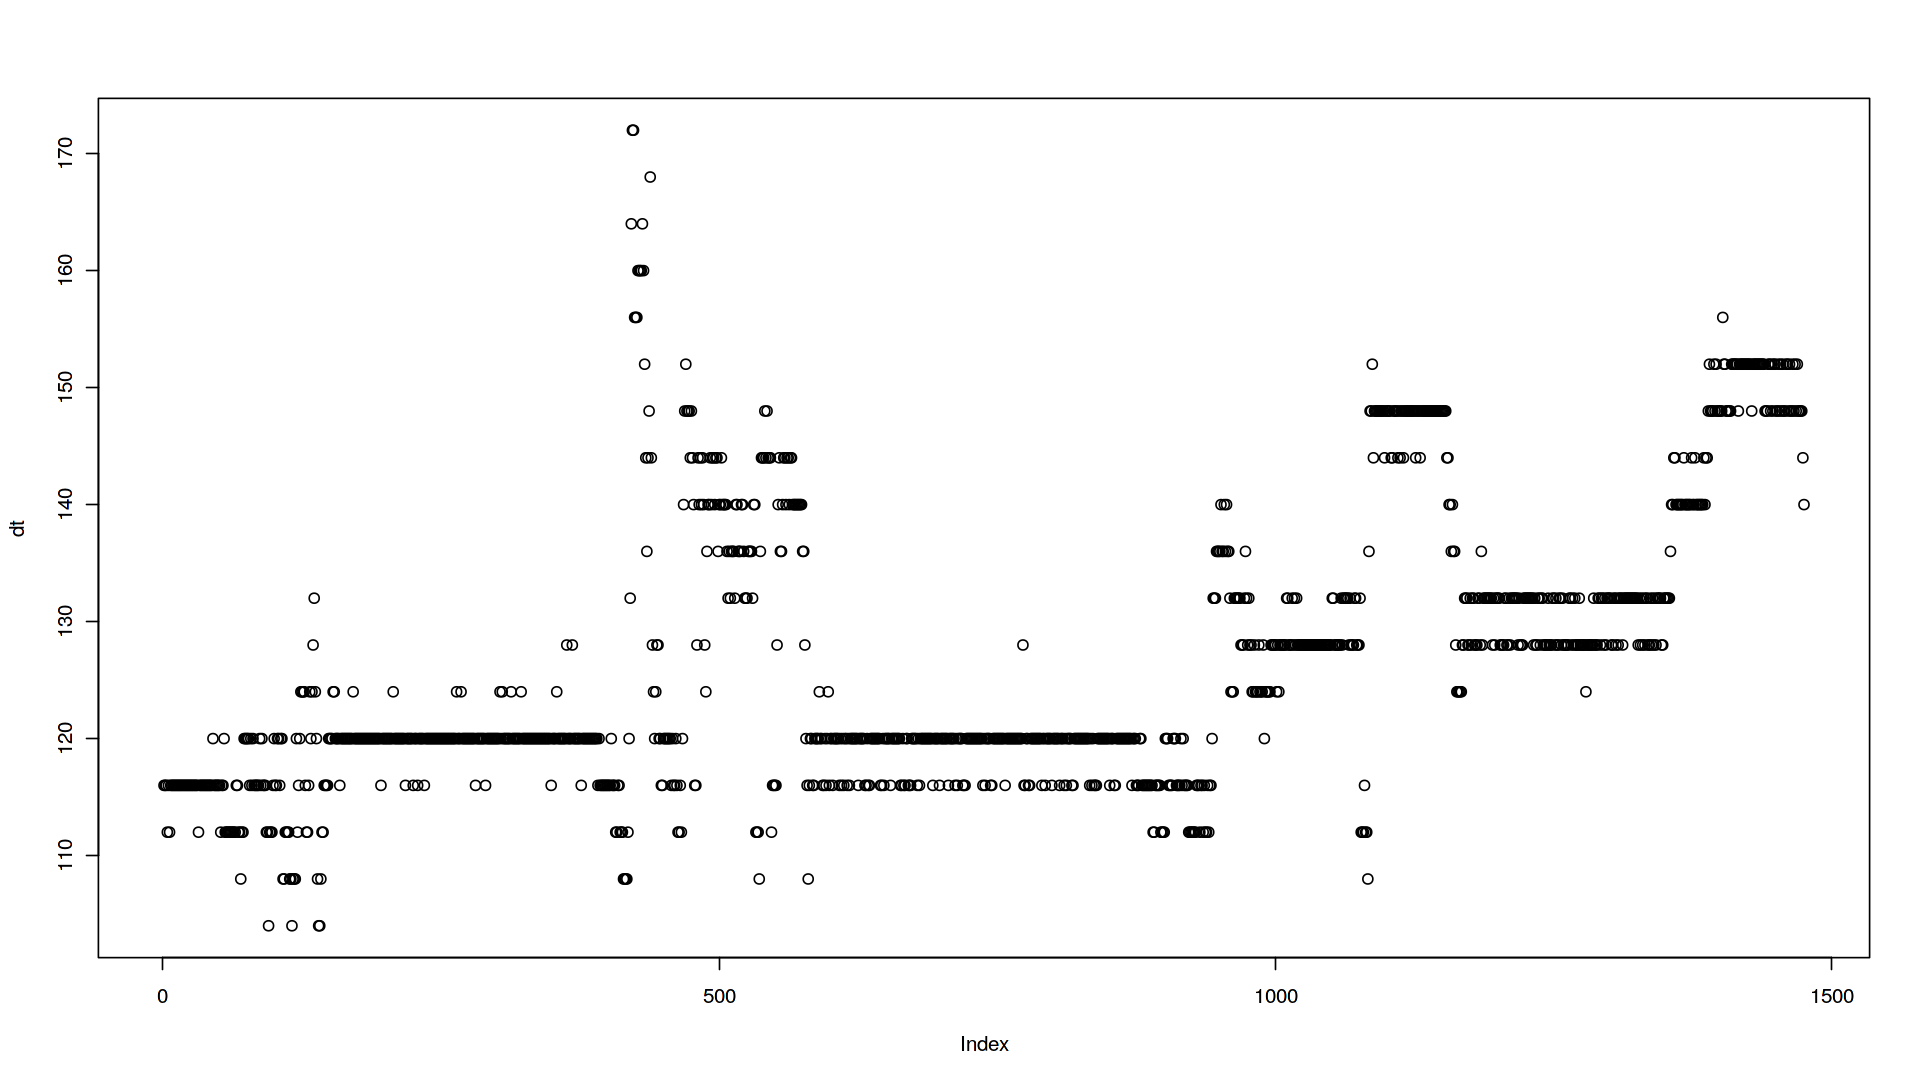

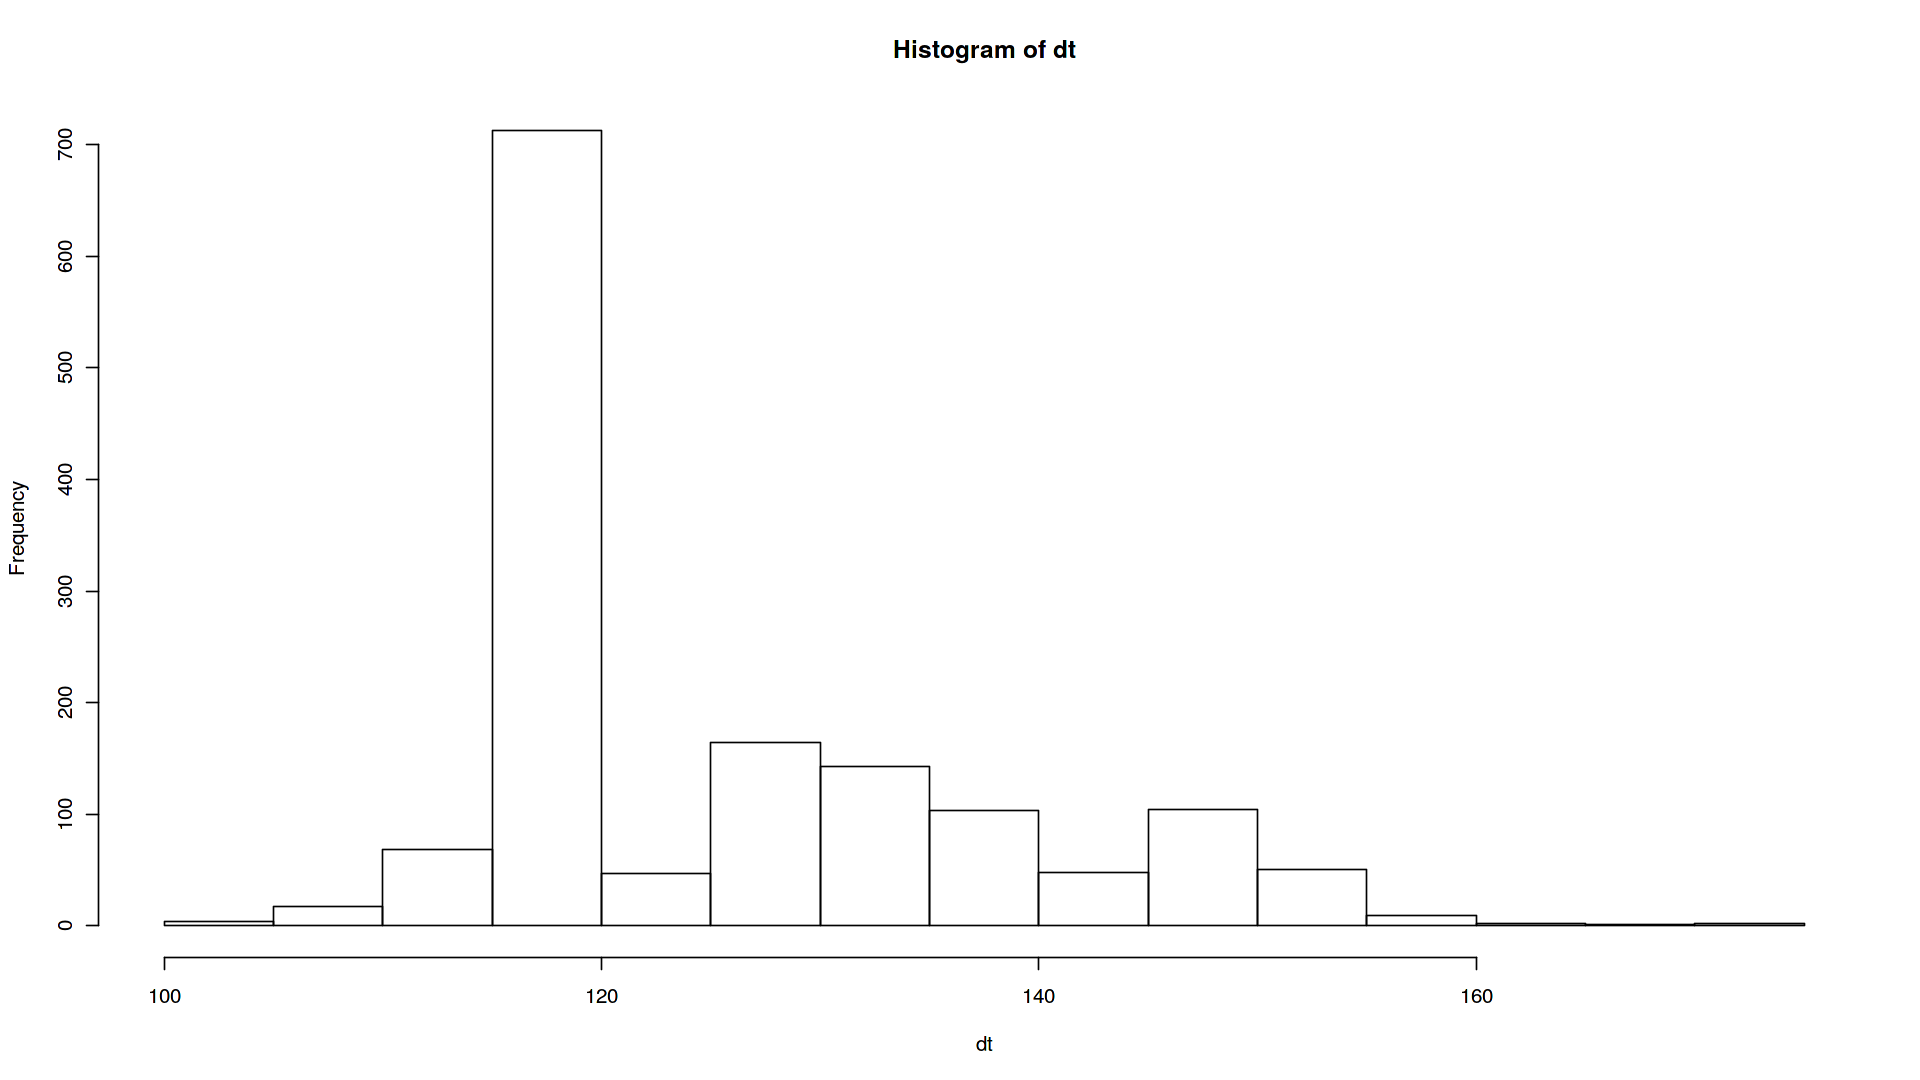

In [90]:
dt <- de$tdown - de$tprende;
mean(dt)
sd(dt)
plot(dt);
hist(dt)

In [5]:
dd <- read.csv("diodedown.csv", header = T, sep = ";");head(dd)

,tprende,tdown
,<int>,<int>
1,57240,57256
2,256876,256892
3,430604,430620
4,589324,589340
5,770056,770072
6,942788,942804


In [6]:
dtd <- dd$tdown - dd$tprende

In [93]:
mean(dtd); sd(dtd)

[1] 14.65323

[1] 1.964715